In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
[features for features in titanic.columns if titanic[features].isnull().sum() > 0]

['age', 'embarked', 'deck', 'embark_town']

Text(0.5, 1.0, 'Age distribution of Titanic Passeneger')

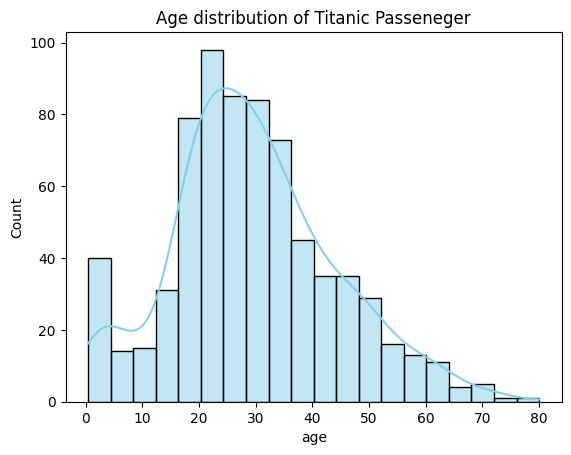

In [6]:
sns.histplot(titanic['age'].dropna(), kde=True, color='skyblue')
plt.title("Age distribution of Titanic Passeneger")

<Axes: ylabel='fare'>

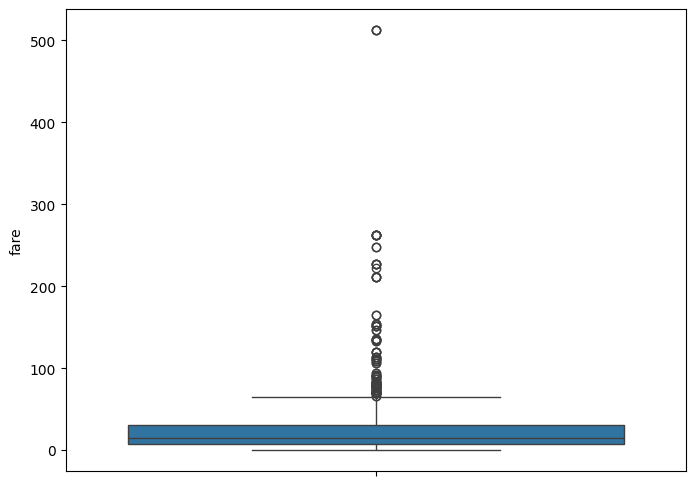

In [7]:
plt.figure(figsize=(8,6))
sns.boxplot(y="fare",data=titanic)

<Axes: xlabel='sex', ylabel='count'>

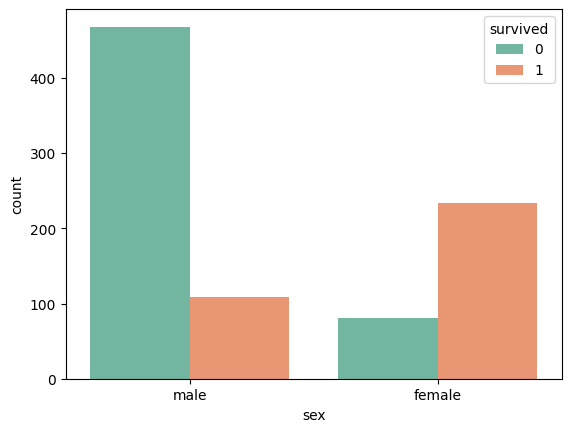

In [8]:
sns.countplot(x="sex",hue="survived",data=titanic,palette="Set2")

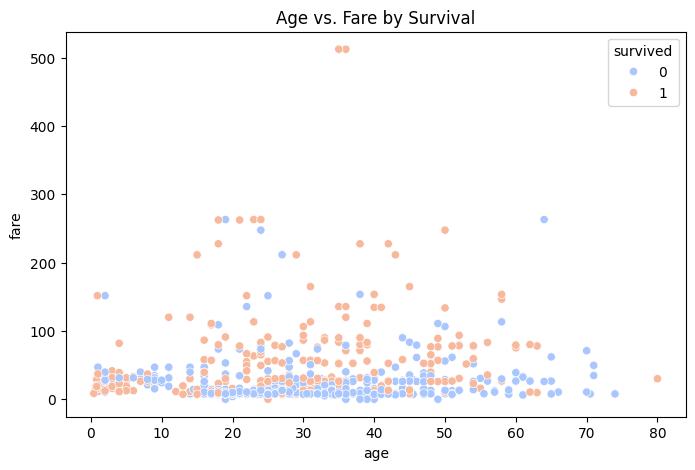

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic, palette='coolwarm')
plt.title("Age vs. Fare by Survival")
plt.show()

In [10]:
pivot_avg_fare = pd.pivot_table(
    titanic,
    values = 'fare',
    index = 'pclass',
    aggfunc= 'mean',
    margins= True,
    margins_name='Total'
)

print(pivot_avg_fare)

             fare
pclass           
1       84.154687
2       20.662183
3       13.675550
Total   32.204208


In [11]:
pivot_survived_count= pd.pivot_table(
    titanic,
    values = 'survived',
    index = 'sex',
    columns='pclass',
    aggfunc= 'count',
    margins= True,
    margins_name='Total'
)

print(pivot_survived_count)

pclass    1    2    3  Total
sex                         
female   94   76  144    314
male    122  108  347    577
Total   216  184  491    891


In [14]:
pivot_avg_fare.to_excel("../../reports/avg_fare_by_class.xlsx" ,sheet_name="Average Fare")

In [15]:
pivot_survived_count.to_excel("../../reports/avg_surv_count.xlsx", sheet_name="Average Survived Count")